In [4]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('nba.csv')
data.head()

球队  13/14常规赛  14/15常规赛  15/16常规赛  16/17常规赛  13/14季后赛  14/15季后赛  15/16季后赛
0    骑士        33        53        57        51         0        14        16
1    猛龙        48        49        56        51         3         0        10
2    热火        54        37        48        41        13         0         7
3    老鹰        38        60        48        43         3         8         4
4  凯尔特人        25        40        48        53         0         0         2

In [5]:
minmax_scale=MinMaxScaler()
X=minmax_scale.fit_transform(data.iloc[:,1::])
X[:5]

array([[0.38297872, 0.7254902 , 0.74603175, 0.65957447, 0.        ,
        0.875     , 1.        ],
       [0.70212766, 0.64705882, 0.73015873, 0.65957447, 0.1875    ,
        0.        , 0.625     ],
       [0.82978723, 0.41176471, 0.6031746 , 0.44680851, 0.8125    ,
        0.        , 0.4375    ],
       [0.4893617 , 0.8627451 , 0.6031746 , 0.4893617 , 0.1875    ,
        0.5       , 0.25      ],
       [0.21276596, 0.47058824, 0.6031746 , 0.70212766, 0.        ,
        0.        , 0.125     ]])

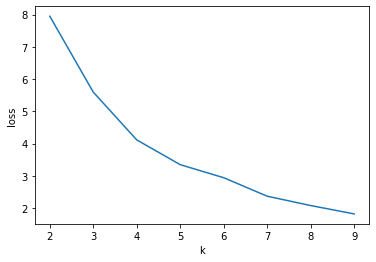

In [6]:
loss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i).fit(X)
    loss.append(model.inertia_)
plt.plot(range(2,10),loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [7]:
k=4
model=KMeans(n_clusters=k).fit(X)

In [8]:
data['cluster']=model.labels_

In [9]:
data

球队  13/14常规赛  14/15常规赛  15/16常规赛  16/17常规赛  13/14季后赛  14/15季后赛  \
0     骑士        33        53        57        51         0        14   
1     猛龙        48        49        56        51         3         0   
2     热火        54        37        48        41        13         0   
3     老鹰        38        60        48        43         3         8   
4   凯尔特人        25        40        48        53         0         0   
5     黄蜂        43        33        48        36         0         0   
6    步行者        56        38        45        42        10         0   
7     活塞        29        32        44        37         0         0   
8     公牛        48        50        42        41         1         6   
9     奇才        44        46        41        49         6         6   
10    魔术        23        25        35        29         0         0   
11    雄鹿        15        41        33        42         0         2   
12   尼克斯        37        17        32        31         0         0   
13    篮网        44        38        21        20         5         2   
14   76人        19        18        10        28         0         0   
15    勇士        51        67        73        67         3        16   
16    马刺        62        55        67        61        16         3   
17    雷霆        59        45        55        47        10         0   
18    快船        57        56        53        51         6         7   
19   开拓者        54        51        44        41         5         1   
20    小牛        49        50        42        33         3         1   
21    灰熊        50        55        42        43         3         6   
22    火箭        54        56        41        55         2         9   
23    爵士        25        38        40        51         0         0   
24    国王        28        29        33        32         0         0   
25    掘金        36        30        33        40         0         0   
26    鹈鹕        34        45        30        34         0         0   
27   森林狼        40        16        29        31         0         0   
28    太阳        48        39        23        24         0         0   
29    湖人        27        21        17        26         0         0   

    15/16季后赛  cluster  
0         16        3  
1         10        0  
2          7        0  
3          4        2  
4          2        1  
5          3        1  
6          3        0  
7          0        1  
8          0        2  
9          0        2  
10         0        1  
11         0        1  
12         0        1  
13         0        1  
14         0        1  
15        15        3  
16         6        0  
17        11        0  
18         2        2  
19         5        2  
20         1        2  
21         0        2  
22         1        2  
23         0        1  
24         0        1  
25         0        1  
26         0        1  
27         0        1  
28         0        1  
29         0        1

In [15]:
for i in range(k):
    print('cluster',i)
    label_data=data[data['cluster']==i].iloc[:,0]
    print(label_data)

cluster 0
1      猛龙
2      热火
6     步行者
16     马刺
17     雷霆
Name: 球队, dtype: object
cluster 1
4     凯尔特人
5       黄蜂
7       活塞
10      魔术
11      雄鹿
12     尼克斯
13      篮网
14     76人
23      爵士
24      国王
25      掘金
26      鹈鹕
27     森林狼
28      太阳
29      湖人
Name: 球队, dtype: object
cluster 2
3      老鹰
8      公牛
9      奇才
18     快船
19    开拓者
20     小牛
21     灰熊
22     火箭
Name: 球队, dtype: object
cluster 3
0     骑士
15    勇士
Name: 球队, dtype: object
